<a href="https://colab.research.google.com/github/Tae1Yuk/ML-Study/blob/main/%08Chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chapter 8-1**

In [3]:
 from tensorflow import keras
 keras.layers.Conv2D(10, kernel_size = (3, 3), activation = 'relu')

In [4]:
 keras.layers.Conv2D(10, kernel_size = (3, 3), activation = 'relu', padding = 'same')

In [5]:
keras.layers.MaxPooling2D(2)

In [7]:
keras.layers.MaxPooling2D(2, strides = 2, padding = 'valid')

## **Chapter 8-2**

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

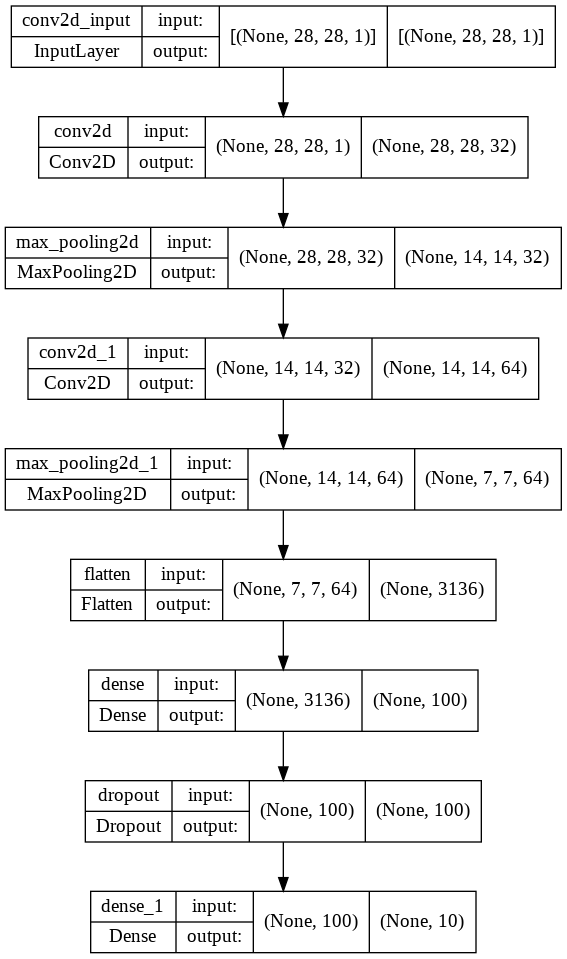

In [7]:
keras.utils.plot_model(model, show_shapes = True)

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.5109 - accuracy: 0.8167 - val_loss: 0.3175 - val_accuracy: 0.8826
Epoch 2/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.3450 - accuracy: 0.8769 - val_loss: 0.2748 - val_accuracy: 0.9001
Epoch 3/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2940 - accuracy: 0.8928 - val_loss: 0.2562 - val_accuracy: 0.9048
Epoch 4/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2635 - accuracy: 0.9042 - val_loss: 0.2447 - val_accuracy: 0.9071
Epoch 5/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2411 - accuracy: 0.9121 - val_loss: 0.2361 - val_accuracy: 0.9136
Epoch 6/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2172 - accuracy: 0.9200 - val_loss: 0.2331 - val_accuracy: 0.9157
Epoch 7/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2033 - accuracy: 0.9255 - val_loss: 0.2181 -

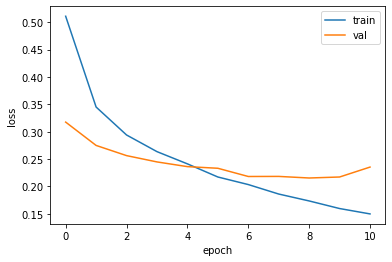

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 7s 18ms/step - loss: 0.2153 - accuracy: 0.9233


[0.21533173322677612, 0.9233333468437195]

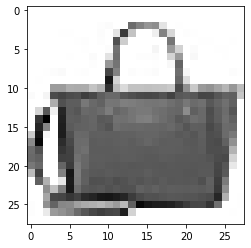

In [11]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap = 'gray_r')
plt.show()

In [13]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[9.5913750e-15 1.0098296e-21 7.0990314e-20 1.5647112e-21 6.8902710e-16
  6.9295458e-16 1.9561869e-16 2.9690104e-14 1.0000000e+00 8.5362379e-17]]


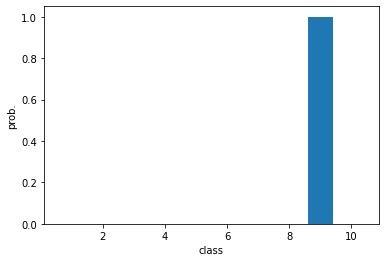

In [14]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [15]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [16]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [17]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [18]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 6s 18ms/step - loss: 0.2391 - accuracy: 0.9153


[0.2390676736831665, 0.9153000116348267]

## **Chapter 8-3**

In [19]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [20]:
model.layers

In [21]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [22]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.029040784 0.25938475


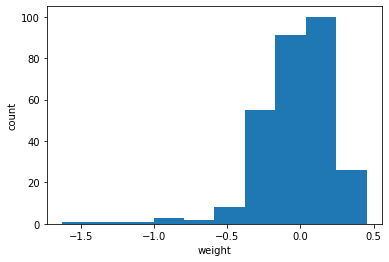

In [23]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

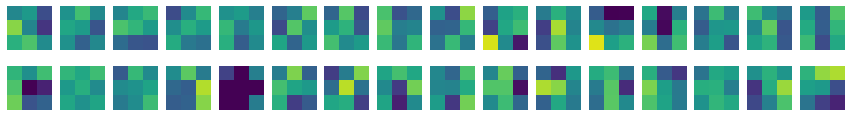

In [24]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')
plt.show()

In [27]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [29]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [30]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0024274853 0.08057687


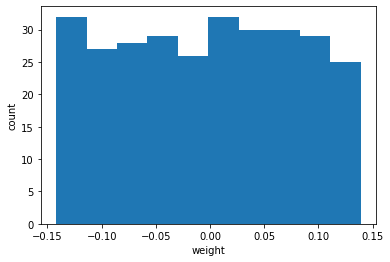

In [31]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

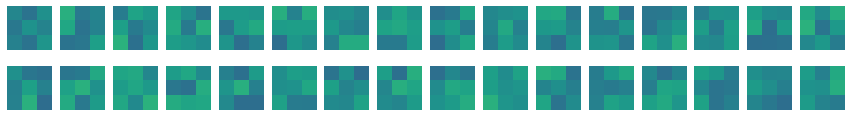

In [32]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')
plt.show()

In [33]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [44]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [45]:
conv_acti = keras.Model(model.input, model.layers[0].output)

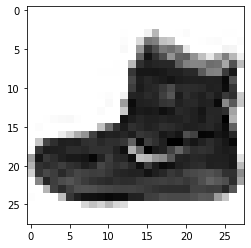

In [47]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [48]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [49]:
print(feature_maps.shape)

(1, 28, 28, 32)


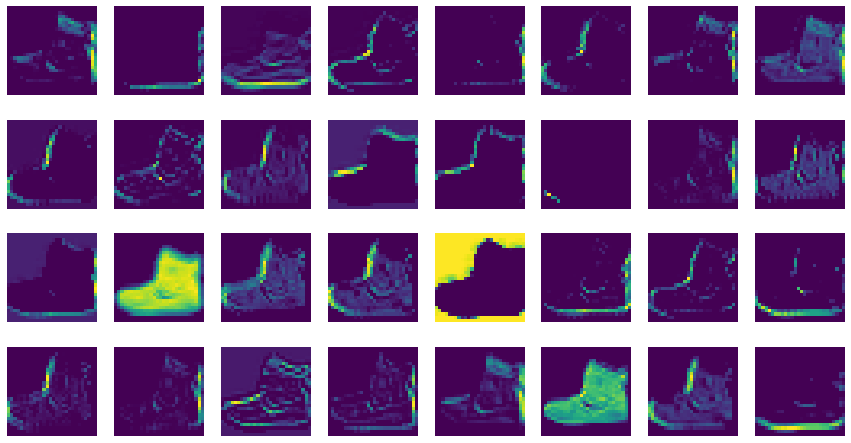

In [51]:
fig, axs = plt.subplots(4, 8, figsize = (15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
    axs[i, j].axis('off')
plt.show()

In [52]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [53]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [54]:
print(feature_maps.shape)

(1, 14, 14, 64)


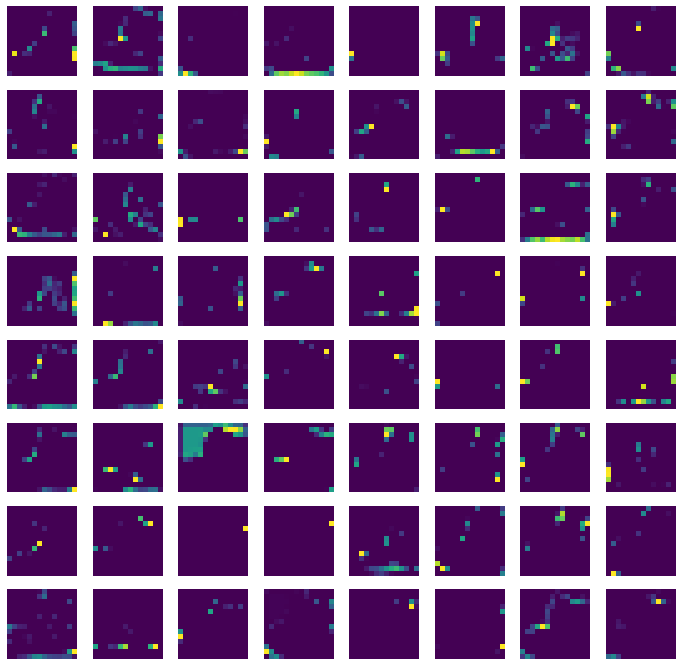

In [55]:
fig, axs = plt.subplots(8, 8, figsize = (12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
    axs[i, j].axis('off')
plt.show()